# **Caso de Estudio**
## Machine learning
## Proyecto final: Propensión a contraer un infarto

Integrantes: César Marín, Jesús Berríos

---



El caso seleccionado a estudiar se basa principalmente en poder predecir si una persona padece de una enfermedad cardíaca y por ende a padecer un infarto. La variable dependendiente o target de este problema es de tipo **binaria** y para su resolución se seguiran las siguientes etapas:

*   Contexto del proyecto y revisión de las variables involucradas
*   Reconocimiento e importación de las librerías y módulos utilizados
*   Procesamiento de datos y exploración descriptiva 
*   Aplicación de módelos de *Clasificación* más importantes y tuning de hiperparámetros 

  1.   Regresión Logística
  2.   Decision Tree Classifier
  3.   Bosque aleatorio de Clasificación
  4.   Support Vector Classifier 

*   Comparación y discusión de resultados en base métricas 
*   Conclusiones

---






Las enfermedades cardiovasculares son la principal causa de muerte de los adultos en Chile y el mundo. El MINSAL (ministerio de salud de Chile) informa 5.895 fallecidos al año, a su vez el INE (Instituto nacional de estadística, 2016) declara que este tipo de decesos corresponden al 27,1% de las muertes totales. Estos problemas son de alta preocupación para los gobiernos del mundo y junto con eso, son ampliamente investigados en el ámbito del Data Science.

Se dice que la tecnología está reformando  el área de la salud. Además de incrementarse la capacidad y confiabilidad en cirugías, consultas y exámenes, la gestión de la información y la aplicación de algoritmos permite no solamente una mejor administración para los recintos y ministerios, también, como en este caso, otorga la posibilidad de saber "automáticamente" si un paciente está en riesgo de sufrir un padecimiento cardíaco.

En este dataset, comúnmente llamado "Cleveland database", se recopiló información de 76 atributos para 303 pacientes. Finalmente se considerarán sólo 14, los cuales representan los factores más determinantes a la hora de detectar un posible infarto.

Estos 14 campos corresponden a:

1. **Edad (age)** (variable contínua). Alto factor de riesgo en el desarrollo de padecimientos.
2. **Sexo (sex)** (0 = mujer, 1 = hombre, categórica). Se ha demostrado que los hombres son más propensos que las mujeres a sufrir problemas cardíacos.
3. **Tipo de dolor de pecho (cp)** (1 = angina típica, 2 = angina atípica, 3 = dolor no anginal o 0 = asintomático, categórica). La angina es un tipo de dolor producido por poca oxigenación en el corazón, sensación de presión. 
4. **Presión sanguínea en reposo (trestbps)** (unidades de mmHg, contínua). Esta condición puede provocar daño a largo plazo en las arterias. Si esto se mezcla con otras condiciones consideradas de riesgo como la obesidad o alto colesterol, el riesgo aumenta considerablemente.
5. **Colesterol (chol)** (colesterol serum, mg/dl, contínua). Es la medición de una proteína de baja densidad.
6. **Azúcar en la sangre (fbs)** (1 = más, 2 = menos de 120mg/dl, categórica). Relacionada con la baja o nula producción de insulina, una hormona secretada por el páncreas.
7. **Electrocardiograma (restecg)** (0 = normal, 1 = anomalía en la onda ST-T, 2 = hipertrofia en ventrículo izquierdo). 
8. **Pulso cardíaco máximo (thalach)** (contínua).
9. **Angina inducida por ejercicio (exang)** (1 = si, 2 = no).
10. **Depresión de Sinus Taquicardia inducida por el ejercicio en relación con el reposo (oldpeak)** (contínua).
11. **Peak de ST en ejercicio (slope)** (1 = sube; 2 = plano; 3 = baja).
12. **Número de vasos principales coloreados por floración (ca)** (de 0 a 4, categórica).
13. **Tasalémia (thal)** (3 = normal; 6 = defecto; 7 = defecto reversible).
14. **Diagnósitico de padecimiento cardíaco (target)** (0 = ausencia, 1,2,3, 4 = presente, categórica).



#### **Librerías a utilizar**

In [ ]:
# Librerías principales
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

# Librerías y módulos relacionadas directamente a métricas de modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Módulos de sklearn para diseño de los modelos
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

# Otras librerías de apoyo
pd.option_context('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import parallel_coordinates

#### **Para ejecución en Colab**
Se efectúa la conexión al drive para obtener los datos

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Se captura el dataset en un dataframe y se ejecuta una lectura rápida de las primeras filas del dataset para comprobar que haya sido cargado de manera correcta para poder trabajarlo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning Caso Corazon/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---
### **Procesamiento de datos y Análisis descriptivo de los datos**

Se hace una exploración inicial de los valores que tenemos en las diferentes variables. Así se tiene idea de la escala que manejan y que concuerden con lo visto en la parte contextual

In [ ]:
# Exploramos los valores únicos de las variables categóricas
print('Variables Categóricas:')
print('Valores sex =',df.sex.unique())
print('Valores cp =',df.cp.unique())
print('Valores fbs =',df.fbs.unique())
print('Valores restecg =',df.restecg.unique())
print('Valores exang =',df.exang.unique())
print('Valores slope =',df.slope.unique())
print('Valores ca =',df.ca.unique())
print('Valores thal =',df.thal.unique())

# Exploramos los valores únicos de las variables continuas
print('\nVariables Continuas:')
print('\nValores trestbps =',df.trestbps.unique())
print('\nValores age =',df.age.unique())
print('\nValores chol =',df.chol.unique())
print('\nValores thalach =',df.thalach.unique())
print('\nValores oldpeak =',df.oldpeak.unique())

Variables Categóricas:
Valores sex = [1 0]
Valores cp = [3 2 1 0]
Valores fbs = [1 0]
Valores restecg = [0 1 2]
Valores exang = [0 1]
Valores slope = [0 2 1]
Valores ca = [0 2 1 3 4]
Valores thal = [1 2 3 0]

Variables Continuas:

Valores trestbps = [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Valores age = [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Valores chol = [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242

Se comprueba los tipos de valores y la existencia de valores nulos:

In [ ]:
# Aplicamos el método info al dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Tal como era de esperarse, al ser un dataset académico, se tiene un conjunto de datos bastante limpio en donde **NO** hay presencia de valores nulos y todos los tipos de variables concuerdan con su contenido. Se observa como oldpeak es la única de tipo float, lo cual es adecuado al tratarse de un atributo con valores decimales


Ahora se utilizará el método *describe* para un primer acercamiento de la distribución de las variables independientes. Se excluyen aquellas categóricas ya que el método describe no aporta mucho a este tipo de variables.



In [ ]:
df[['trestbps','age', 'chol', 'thalach','oldpeak']].describe()

,trestbps,age,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,131.623762,54.366337,246.264026,149.646865,1.039604
std,17.538143,9.082101,51.830751,22.905161,1.161075
min,94.000000,29.000000,126.000000,71.000000,0.000000
25%,120.000000,47.500000,211.000000,133.500000,0.000000
50%,130.000000,55.000000,240.000000,153.000000,0.800000
75%,140.000000,61.000000,274.500000,166.000000,1.600000
max,200.000000,77.000000,564.000000,202.000000,6.200000


Se puede observar que la muestra de pacientes se compone de personas de entre 29 y 77 años, y con una media de 54.3, lo que concuerda en términos generales con el rango planteado por especialistas "La edad promedio de mayor incidencia se encuentra ente los 50 y 70 años, sin embargo este rango recientemente se ha modificado y ahora es muy frecuente encontrar pacientes de 30 y 40 años (algunas veces más jóvenes) con infartos agudos".

Fuente: https://hospitalesangeles.com/saludyvida/padecimientos/articulo.php?id=1149#:~:text=La%20edad%20promedio%20de%20mayor,los%20factores%20de%20riesgo%20que



Dentro de estas variables llama la atención enseguida los valores elevados de colesterol. El límite superior para ser considerado como valores normales es de 200 mg/dL. En este dataset se tiene un promedio de 246 e incluso 1er cuartil ya se encuentre por encima de estos límites seguros. Está comprobado que valores altos de colesterol tiene relacionados enfermedades y padecimientos como obesidad y de tipo cardiovasculares.


#### **Análisis de distribución de los datos**

Text(0, 0.5, 'Frecuencia')

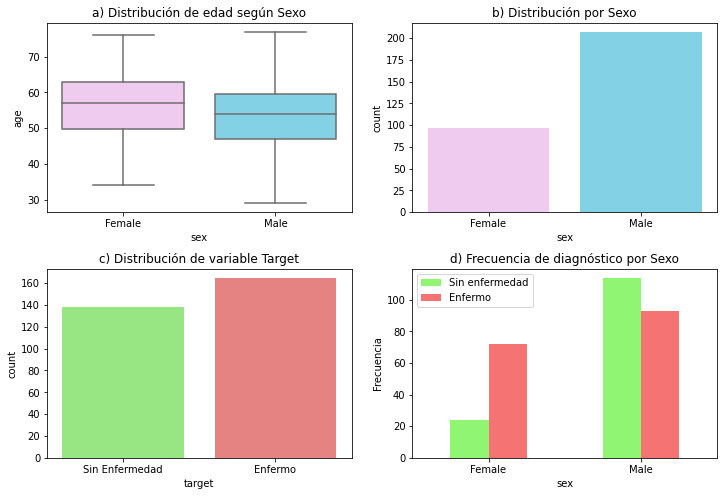

In [ ]:
# Se preparan las visualizaciones 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,8))
fig.subplots_adjust(hspace=0.3)
axes = axes.flatten()
ax = axes[0]
# Exploramos la distribución de las edades según el sexo en el dataset
sns.boxplot(x='sex', y='age', data=df, palette=['#F5C5F5','#73DAF5'],ax=ax)
ax.set_xticklabels(['Female','Male'])
ax.set_title('a) Distribución de edad según Sexo')
ax = axes[1]
# Distribución de los datos según sexo
sns.countplot(x='sex', data=df, palette=['#F5C5F5','#73DAF5'],ax=ax)
ax.set_xticklabels(['Female','Male'])
ax.set_title('b) Distribución por Sexo')
ax = axes[2]
# Revisamos que tan balanceadas estan nuestras clases
sns.countplot(x="target", data=df, palette=['#8FF573','#F57373'],ax=ax)
ax.set_title('c) Distribución de variable Target')
ax.set_xticklabels(['Sin Enfermedad','Enfermo'],rotation=0)
ax = axes[3]
#Frecuencia de diagnóstico por sexo
pd.crosstab(df.sex,df.target).plot(kind="bar",ax=ax,color=['#8FF573','#F57373'])
ax.set_title('d) Frecuencia de diagnóstico por Sexo')
ax.set_xticklabels(['Female','Male'],rotation=0)
ax.legend(["Sin enfermedad", "Enfermo"])
ax.set_ylabel('Frecuencia')

a) Se observa una distribución de edades similar en donde la muestra de mujeres presenta una media de edad un poco mayor que la de hombres. Se trata de un dataset donde las edades van desde los 30 hasta casi los 80 años. Es normal que esta población se concentre entre los 50 y los 60 años ya que es en este segmendo de edades donde son más comunes las complicaciones y padecimientos cardiovasculares.

b) En cuanto a la distribución de la muestra por sexo se puede apreciar que 2/3 del dataset se compone de datos de hombres y el 1/3 restante de datos de mujer por lo que no existe balance con respecto al sexo y se tiene el riesgo de que en un futuro modelamiento los datos de sexo mujer arrojen resultados sesgados dada la proporción de la muestra.

c) Con respecto a la variable target se puede observar que está ligeramente desbalanceada con pocas diferencias entre target 0 y 1.

d) Se aprecia que la gran mayoría de diagnósticos para mujeres es de categoría "Enfermo", mientras que para los hombres predomina la categoría "Sin enfermedad" pero con mucha menor diferencia de la categoría predominante respecto a la restante si se compara con los datos de mujer.

#### **Evaluación de variables significativas para predecir la variable target**

A continuación se comenzará evaluar y explorar si existen variables que influyen de manera crucial en la variable target. De igual forma, la importancia de features sobre la clasificación de Enfermedad/No enfermedad se contrastará con en los modelos de machine learning a aplicar.

Se procede a representar el dataset en el **gráfico de coordenadas paralelas** para explorar si alguna variable puede ser determinante en la predicción del target.

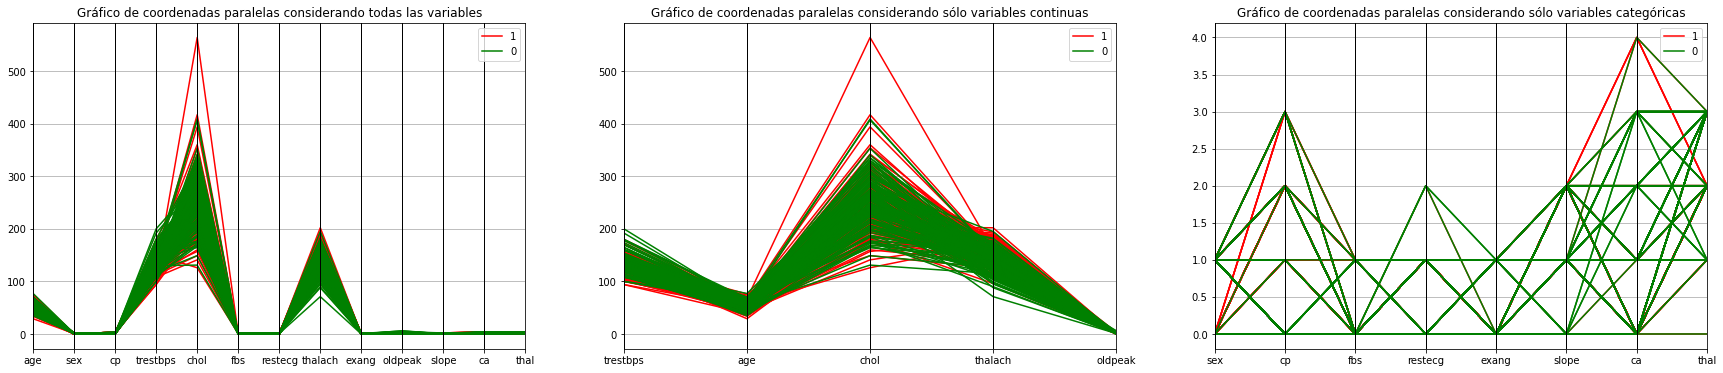

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (30,6))
fig.subplots_adjust(hspace=0.3)
axes = axes.flatten()
ax = axes[0]
ax.set_title("Gráfico de coordenadas paralelas considerando todas las variables")
parallel_coordinates(df, "target", color = ['red', 'green'],ax=ax)
ax = axes[1]
ax.set_title("Gráfico de coordenadas paralelas considerando sólo variables continuas")
parallel_coordinates(df[['trestbps','age', 'chol', 'thalach','oldpeak','target']], "target", color = ['red', 'green'],ax=ax)
ax = axes[2]
ax.set_title("Gráfico de coordenadas paralelas considerando sólo variables categóricas")
parallel_coordinates(df[['sex','cp', 'fbs', 'restecg','exang','slope','ca','thal','target']], "target", color = ['red', 'green'],ax=ax)


Gracias a los gráficos de coordenadas paralelas es posible apreciar si existe una diferenciacion clara de alguna variable para las dos posibles clases de la variable objetivo. 

En primera instancia, en el primer gráfico, no se puede apreciar aún alguna conclusión clara debido en gran parte a la gran diferencia de escalas que tiene cada variable. Debido a esto se decidió dividir el gráfico en variables continuas y categóricas, las cuales comparten rangos mucho más parecidos.


*   Variables continuas: Se puede apreciar que se logra una pequeña diferenciación en la variable target=1=Enfermo en muestras con valores bajos de presión sanguínea en reposo *trestbps*, y valores altos de colesterol *chol* y pulso cardíaco máximo *thalach*. Aun así, esto sólo ocurre para algunas muestras y no se puede apreciar que alguna variable pueda hacer clara la diferenciación de los resultados *target*. 
*   Variables Categóricas: No existe mayor información de las variables para direrenciar el *target*. Sólo resulta importante destacar como para el valor de 4 de la variable *ca* se observa una diferenciación más o menos clara para pacientes categorizados como propensos a padecimiento cardíaco.







Representación de **Heatmap** del dataset:

a) Se utilizará Heatmap con correlación de Pearson para obtener una vista previa de correlación entre todas las variables

b) Se empleará correlación de Pearson para verificar correlación entre las variables continuas, se incluye además la variable target.

c) Se aplicará correlación de Spearman para verificar correlación entre las variables categóricas, se incluye además la variable target.

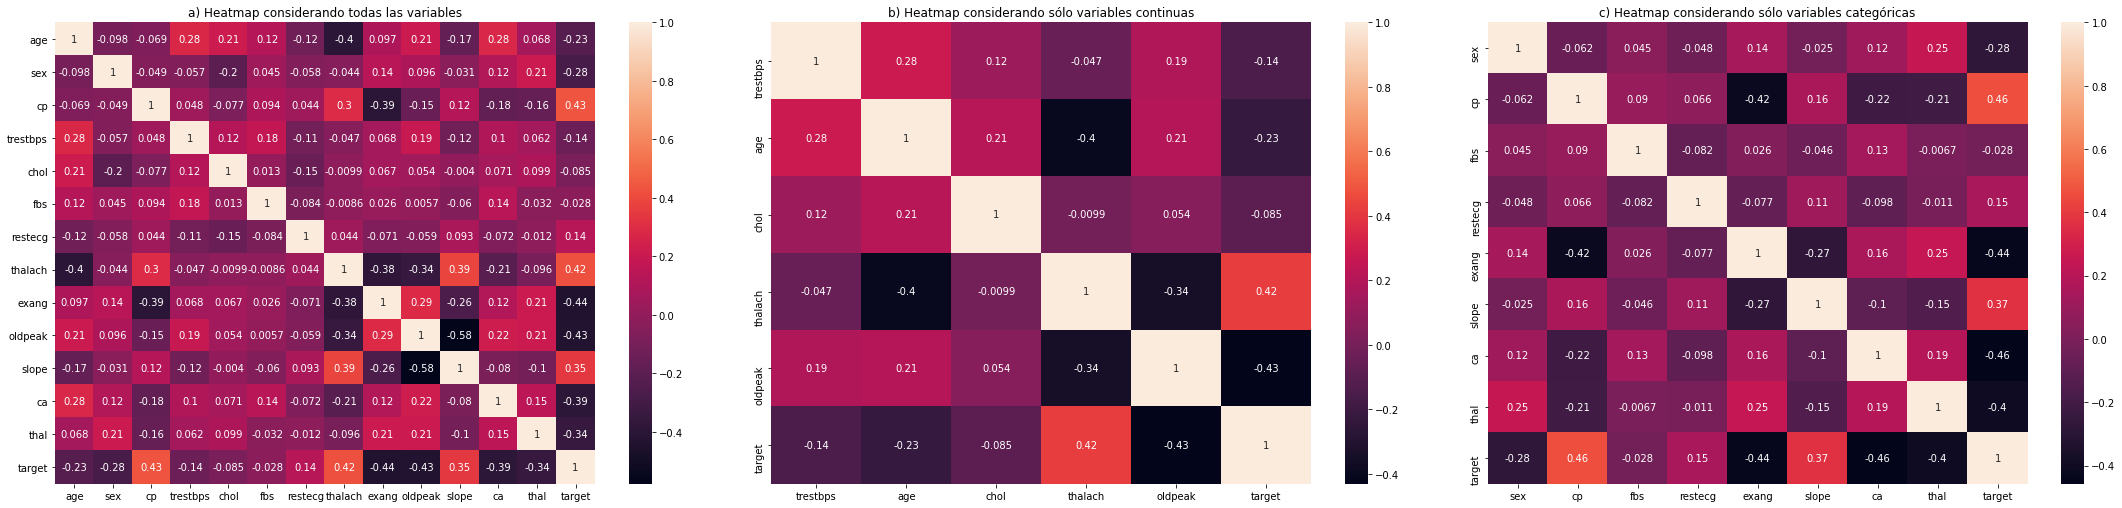

In [ ]:
#Representación de Heatmap todas las variables, continuas y categóricas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (30,7))
fig.tight_layout()
axes = axes.flatten()
ax = axes[0]
ax.set_title("a) Heatmap considerando todas las variables")
corrMatrix_all = df.corr('pearson')
sns.heatmap(corrMatrix_all, annot=True, ax=ax)
ax = axes[1]
ax.set_title("b) Heatmap considerando sólo variables continuas")
corrMatrix_cont = df[['trestbps','age', 'chol', 'thalach','oldpeak','target']].corr('pearson')
sns.heatmap(corrMatrix_cont, annot=True, ax=ax)
ax = axes[2]
ax.set_title("c) Heatmap considerando sólo variables categóricas")
corrMatrix_cat = df[['sex','cp', 'fbs', 'restecg','exang','slope','ca','thal','target']].corr('spearman')
sns.heatmap(corrMatrix_cat, annot=True, ax=ax)

a) Se puede apreciar que el máximo valor absoluto de correlación entre variables es de 0.58, lo cual no indica una correlación muy alta entre las variables, el cual sería un valor más aproximado a 1 o -1. Las variables que poseen dicha correlación son *slope* y *oldpeak*, las cuales son categórica y continua respectivamente. Con respecto a la variable *target* no se observa alguna variable que posea un valor significativo de correlación.

b) En cuanto a las variables continuas se puede apreciar que las variables que tienen mayor correlación con la variable *target* son *oldpeak* y *thalach*, aun así no superan el valor de 0.5 en correlación de Pearson.

c) Con respecto a las variables categóricasse tiene que las variables con mayor correlación de Spearman (ranking) con el *target* son *cp*, *exang*, *ca* y *thal*, pero al igual que en los escenarios anteriores no hay un valor de correlación significativamente alto.

En términos generales se tiene que no hay una correlación suficientemente alta entre variables dependientes y tampoco existen variables fuertemente (de manera positiva o negativa) correlacionadas con la variable *target*.

Representación **Pairplot** con distinción de la variable *target* por color:

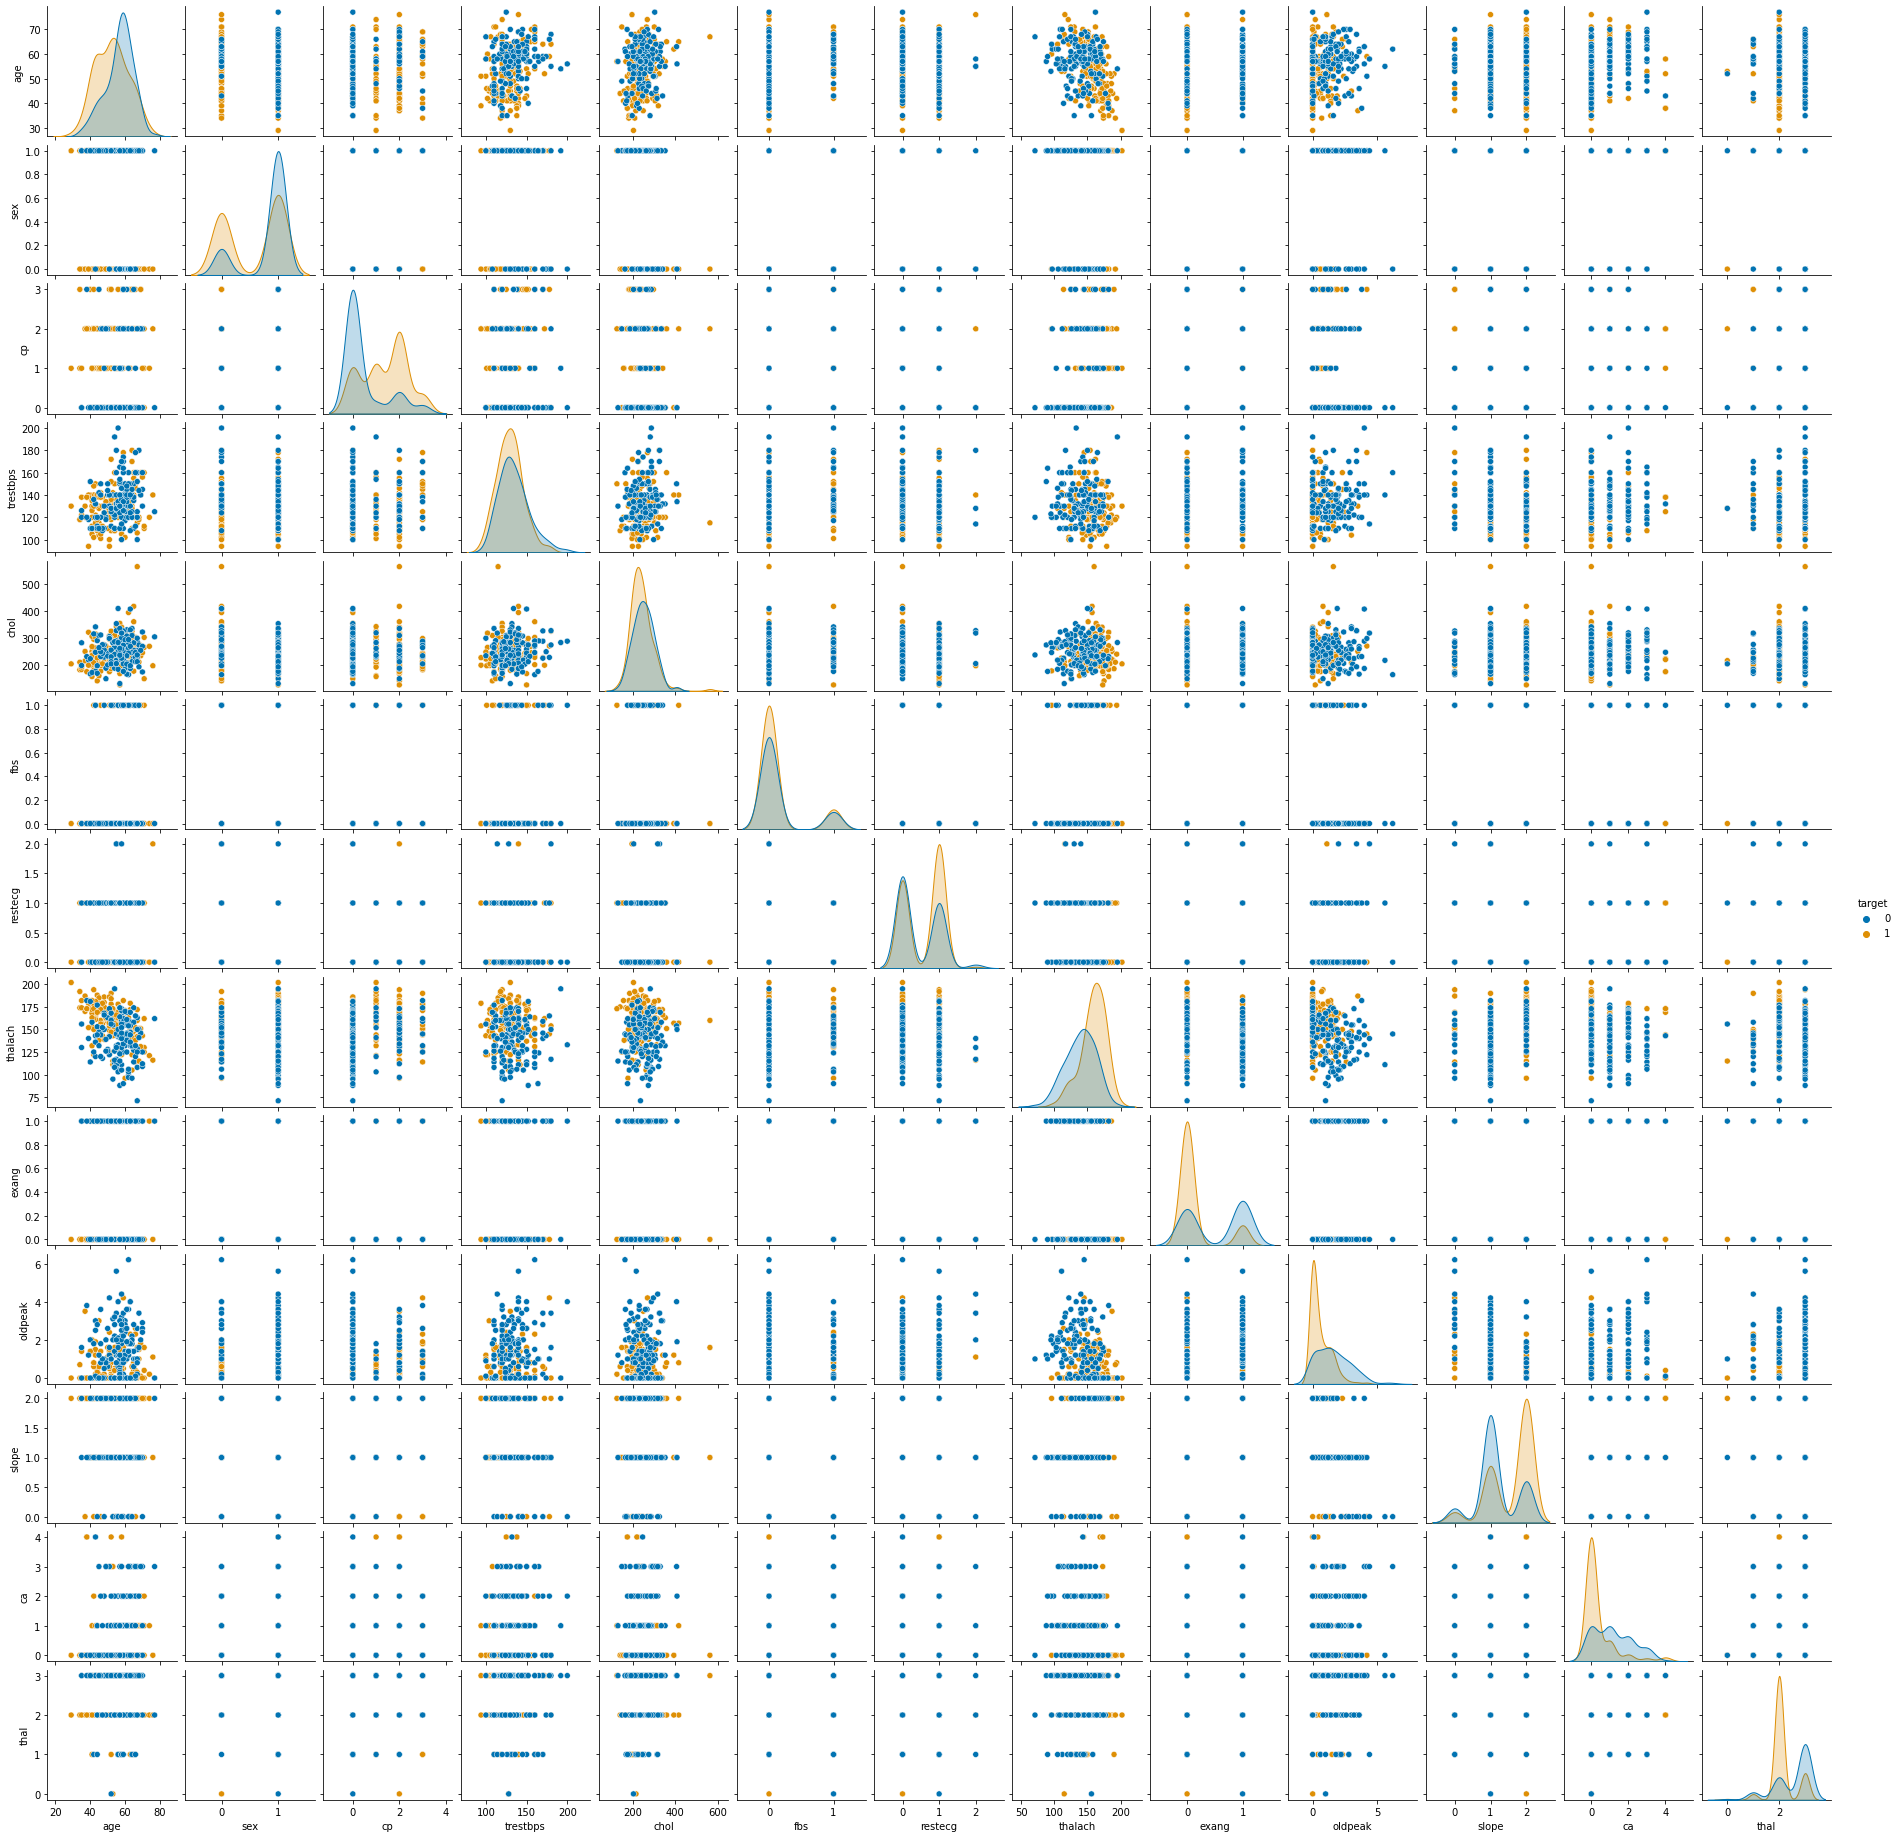

In [ ]:
sns.pairplot(df, hue="target", height = 2, palette = 'colorblind');

Del resultado obtenido en el pairplot en el cual se diferencian las clases binarias resultantes por color, se aprecia que ni en los histogramas de clases ni en los scatterplot existe una separación de los puntos azules y amarillos que corresponden a target 0 y 1 respectivamente. 

Dado este resultado y teniendo en cuenta lo analizado en los gráficos de coordenadas paralelas y heatmap, se confirma: **En el dataset que se está trabajando no existe alguna variable significativa por sí misma para separar el target**.


#### **Definición de variables dummies**
Debido a que se tiene presencia de variables categóricas las cuales no son binarias ni representan un ranking ordenado (Chest Pain, Tipo de Pendiente ST, Tipo de Talasemia y  Tipo de resultado del electrocardigrama en el descanso) se procede a separarlas en variables dummies. De esta manera los modelos no interpretan distancias ni preponderancias entre las diferentes categorías. Cabe destacar variables como por ejemplo *ca*, que se refiere a los vasos coloreados en la coronariografía, no es pasada a dummie ya que efectivamente se refiere una cantidad en donde además el cero representa la ausencia de esta.

In [ ]:
# Se lleva a cabo el proceso
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")
restecg_dum = pd.get_dummies(df['restecg'], prefix = "restecg")

# Añadimos las nuevas variables, ahora como dummies, al dataset
df = pd.concat([df, cp_dum, thal_dum, slope_dum, restecg_dum], axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope','restecg'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0


### Aplicación de modelos de clasificación

#### **- Separación del set de datos en conjuntos train/test**

In [ ]:
#Se declaran variables dependientes y target
y = df.target.values
x = df.drop(['target'], axis = 1)

#Separación del set de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

Creación de funciones para calcular e imprimir métricas

In [ ]:
# Se crea la función "metricas" para calcular los indicadores de la matríz de confusión.
def metricas (TN, FP, FN, TP):
    Sensibilidad = TP/(TP + FN)
    Especifidad = TN / (TN + FP)
    Exactitud = (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP)

    return Sensibilidad,Especifidad,Precision,Exactitud

# Se crea la función "print_metrics" para calcular los indicadores de la matríz de confusión en distintos umbrales
def print_metrics (probabilidades, y_test, num_tr):

    df_prob = pd.DataFrame(probabilidades[:,1])
    df_metricas = pd.DataFrame(columns = [round(x/num_tr,2) for x in range(1, num_tr)], 
                               index=['TP','FN','FP','TN','Sensibilidad','Especifidad','Precision','Exactitud'])

    for i in range(1,num_tr):
        df_prob['prediction']=np.where(df_prob[0]>i/num_tr,1,0)
        df_prob['actual'] = y_test
        TN, FP, FN, TP = confusion_matrix(df_prob['actual'],df_prob['prediction']).ravel()
        Sensibilidad,Especifidad,Precision,Exactitud = metricas(TN, FP, FN, TP)
        df_metricas[round(i/num_tr,2)] = pd.Series({'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN, 
                                              'Sensibilidad':round(Sensibilidad,2), 'Especifidad':round(Especifidad,2), 
                                              'Precision':round(Precision,2), 'Exactitud':round(Exactitud,2)})
    return df_metricas

#### **1) Regresión Logística**

Se procede a aplicar la estandarización *StandardScaler* para evitar diferencias de magnitud entre variables y posteriormente se aplica el *fit* del modelo de regresión logística a los datos de train

In [ ]:
#Se aplica estandarización StandardScaler y Regegresión logística
pipe_std_set = make_pipeline(StandardScaler(),LogisticRegression())
pipestd_set = pipe_std_set.fit(x_train,y_train)
probabilidades_set_std = pipe_std_set.predict_proba(x_test)

Se aplica la función print_metrics para determinar el umbral óptimo del modelo de Regresión Logística

In [ ]:
#Se aplica la función print_metrics para determinar el umbral óptimo del modelo de Regresión Logística
df_metricas_reg = print_metrics(probabilidades_set_std,y_test,50)
df_metricas_reg

,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20,0.22,0.24,0.26,0.28,0.30,0.32,0.34,0.36,0.38,0.40,0.42,0.44,0.46,0.48,0.50,0.52,0.54,0.56,0.58,0.60,0.62,0.64,0.66,0.68,0.70,0.72,0.74,0.76,0.78,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98
TP,47.00,47.00,47.00,46.00,46.00,46.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,44.00,44.00,44.00,43.00,41.00,40.00,40.00,40.00,40.00,38.00,36.00,35.00,35.00,35.00,34.00,34.00,32.00,31.00,31.00,30.00,30.00,30.00,28.00,26.00,26.00,25.00,23.00,18.00,10.00,6.00
FN,0.00,0.00,0.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,4.00,6.00,7.00,7.00,7.00,7.00,9.00,11.00,12.00,12.00,12.00,13.00,13.00,15.00,16.00,16.00,17.00,17.00,17.00,19.00,21.00,21.00,22.00,24.00,29.00,37.00,41.00
FP,32.00,26.00,22.00,22.00,20.00,18.00,18.00,17.00,15.00,15.00,15.00,15.00,15.00,14.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,11.00,10.00,10.00,10.00,9.00,8.00,8.00,8.00,8.00,8.00,8.00,6.00,5.00,5.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,0.00
TN,12.00,18.00,22.00,22.00,24.00,26.00,26.00,27.00,29.00,29.00,29.00,29.00,29.00,30.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,33.00,34.00,34.00,34.00,35.00,36.00,36.00,36.00,36.00,36.00,36.00,38.00,39.00,39.00,40.00,40.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,43.00,43.00,43.00,44.00
Sensibilidad,1.00,1.00,1.00,0.98,0.98,0.98,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.94,0.94,0.94,0.91,0.87,0.85,0.85,0.85,0.85,0.81,0.77,0.74,0.74,0.74,0.72,0.72,0.68,0.66,0.66,0.64,0.64,0.64,0.60,0.55,0.55,0.53,0.49,0.38,0.21,0.13
Especifidad,0.27,0.41,0.50,0.50,0.55,0.59,0.59,0.61,0.66,0.66,0.66,0.66,0.66,0.68,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.75,0.77,0.77,0.77,0.80,0.82,0.82,0.82,0.82,0.82,0.82,0.86,0.89,0.89,0.91,0.91,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.98,0.98,0.98,1.00
Precision,0.59,0.64,0.68,0.68,0.70,0.72,0.71,0.73,0.75,0.75,0.75,0.75,0.75,0.76,0.78,0.78,0.78,0.78,0.78,0.77,0.77,0.77,0.80,0.80,0.80,0.80,0.82,0.83,0.83,0.82,0.81,0.81,0.81,0.85,0.87,0.86,0.89,0.89,0.94,0.94,0.94,0.93,0.93,0.93,0.93,0.96,0.95,0.91,1.00
Exactitud,0.65,0.71,0.76,0.75,0.77,0.79,0.78,0.79,0.81,0.81,0.81,0.81,0.81,0.82,0.84,0.84,0.84,0.84,0.84,0.82,0.82,0.82,0.84,0.82,0.81,0.81,0.82,0.84,0.81,0.79,0.78,0.78,0.78,0.79,0.80,0.78,0.78,0.78,0.79,0.79,0.79,0.77,0.75,0.75,0.74,0.73,0.67,0.58,0.55


De los resultados de la evaluación de las métricas del modelo de regresión sobre distintos umbrales se puede apreciar que el umbral que contiene los valores más elevados de las métricas se encuentran para un umbral entre 0.3 y 0.4, por lo que se procede a elegir el umbral **0.35** para la función de decisión por probabilidades. Se procede a aplicar dicha función para determinar las predicciones:

In [ ]:
df_prob = pd.DataFrame(probabilidades_set_std[:,1])
df_prob['prediction']=np.where(df_prob[0]>0.35,1,0)
df_prob['actual'] = y_test

df_prob.head()

,0,prediction,actual
0,0.004732,0,0
1,0.939576,1,1
2,0.950812,1,1
3,0.454064,1,0
4,0.013345,0,0


Se aplica la matriz de confusión empleando la función de decisión escogida y se grafica la curva ROC para observar el comportamiento del modelo ante distintos umbrales sobre las métricas de Sensibilidad y Especifidad.

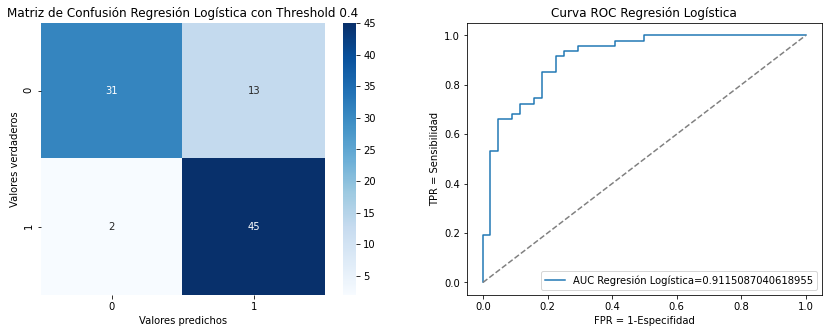

Sensibilidad = 0.9574468085106383
Especifidad = 0.7045454545454546
Precisión = 0.7758620689655172
Exactitud = 0.8351648351648352


In [ ]:
#Matriz de confusión y Curva ROC Regresión Logística
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
axes = axes.flatten()
#Matriz de confusión
ax = axes[0]
TN_lr, FP_lr, FN_lr, TP_lr = confusion_matrix(df_prob['actual'],df_prob['prediction'], labels=[0,1]).ravel()
sns.heatmap([[TN_lr, FP_lr],[FN_lr, TP_lr]], annot=True,cmap=plt.cm.Blues,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Regresión Logística con Threshold 0.4')
#Curva ROC
ax = axes[1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, pipe_std_set.predict_proba(x_test)[:,1])
auc_lr = roc_auc_score(y_test, pipe_std_set.predict_proba(x_test)[:,1])
ax.set_xlabel('FPR = 1-Especifidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_lr, tpr_lr, label="AUC Regresión Logística="+str(auc_lr))
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Regresión Logística')
ax.legend(loc='lower right')
plt.show()


Sensibilidad_lr,Especifidad_lr,Precision_lr,Exactitud_lr = metricas (TN_lr, FP_lr, FN_lr, TP_lr)

print(f'Sensibilidad = {Sensibilidad_lr}\nEspecifidad = {Especifidad_lr}\nPrecisión = {Precision_lr}\nExactitud = {Exactitud_lr}')

* De la matriz de confusión se puede observar sólo **2 valores** de Falsos Negativos, que en el contexto del problema serían los pacientes enfermos categorizados como pacientes sin enfermedad por lo que la métrica de Sensibilidad tiene gran relevancia y es posible que priorice la elección del mejor modelo en la comparación final.
* Se obtiene un valor de exactitud de **0.84** el cual es el mejor posible para todos los umbrales.
* El área bajo la curva resultante es de **0.91**

Distribución de frecuencias por clase:

Text(0.5, 1.0, 'Distribución de frecuencias por clase')

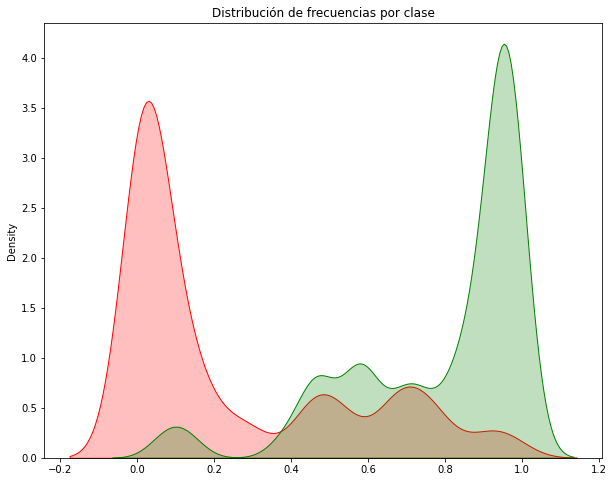

In [ ]:
#Se grafica la distribución de frecuencias por clase
df_dist_prob= pd.DataFrame(probabilidades_set_std)
df_dist_prob = pd.concat([df_dist_prob,pd.DataFrame(y_test)], axis=1)
df_dist_prob.columns = ['0','1','real']

target_0 = df_dist_prob.loc[df_dist_prob['real'] == 0]
target_1 = df_dist_prob.loc[df_dist_prob['real'] == 1]

plt.figure(figsize=(10,8))
sns.distplot(target_0[['1']],bins=9, hist=False, color='red', label= 'Negativos',kde_kws={'bw':0.2,'shade':True})
sns.distplot(target_1[['1']], bins=9, hist=False, color= 'green', label='Positivos',kde_kws={'bw':0.2,'shade':True})
plt.title('Distribución de frecuencias por clase')


En este gráfico importante del performance del modelo se puede comprobar visualmente como este está separando las clases 0-1 del target. Idealmente este gráfico contempla que ambas opciones se ubiquen a los extremos y se solapen lo menos posible. En este caso, se obtuvo un desempeño satisfactorio en términos generales. Se observa como el punto de cruce de ambas curvas está relativamente separado de 0.5 lo cual era de esperarse debido al ligero desbalance de clases ya observado. Además, se aprecia como existe un desbalance un poco más evidente en los falsos diagnósticos. Claramente hay una mayor cantidad de diagnósticos **Falsos Positivos** (área roja debajo de la verde).

Se obtienen los valores de los coeficientes Beta de la regresión logística para ejecutar análisis de significancia de variables en el modelo:

In [ ]:
#Se guardan los Beta normalizados en un dataframe y se ordenan por valor absoluto
df_beta = pd.DataFrame(pipestd_set[-1].coef_.tolist()[0],index=x.columns,columns=['Beta_Coef_LR'])
df_beta['Abs_Beta'] = (df_beta['Beta_Coef_LR']*df_beta['Beta_Coef_LR'])**(1/2)
df_beta = df_beta.sort_values(by='Abs_Beta',ascending=False)
df_beta

,Beta_Coef_LR,Abs_Beta
ca,-0.763807,0.763807
sex,-0.571143,0.571143
cp_0,-0.569019,0.569019
trestbps,-0.463203,0.463203
exang,-0.445213,0.445213
cp_2,0.436070,0.436070
thal_3,-0.377009,0.377009
oldpeak,-0.371365,0.371365
thal_2,0.341734,0.341734
thalach,0.297157,0.297157


Dado que previo a la aplicación del modelo de Regresión Logística se aplicó estandarización de escala, se tiene que los valores de los coeficientes Beta resultantes tampoco estarán afectados por el fenómeno de escala, por lo que las **variables que resultaron con mayor significancia para el modelo** son:
* ***ca***: Variable con mayor significancia, se refiere al número de vasos principales coloreados por floración.
* ***sex***: Variable del sexo de la persona.
* ***cp_0***:  Variable dolor de pecho con valor 0 que corresponde a si el paciente tiene dolor de pecho o no.

Se ejecuta CrossValidation al set completo de datos utilizando el modelo de Regresión Logística, de manera de asegurar que el train/test aplicado desde un inicio no esté sesgado y el set de datos completo responda con valores de precisión similares a los evaluados sólo con el set de test.

In [ ]:
# Se ejecuta Cross Validation al set completo para comprobar que el primer train/test split no está sesgado
cv = KFold(n_splits=4, shuffle=True, random_state=23)
i=1
scores_lr = []
for i, score in enumerate(cross_validate(pipe_std_set, x,y, cv=cv)["test_score"]):
    print(f"Exactitud para la CV #{i}: {score}")
    scores_lr.append(score)

cross_validation_score_lr = np.mean(scores_lr)
print('\nExactitud promedio en Cross Validation =',cross_validation_score_lr)

Exactitud para la CV #0: 0.8157894736842105
Exactitud para la CV #1: 0.8421052631578947
Exactitud para la CV #2: 0.7631578947368421
Exactitud para la CV #3: 0.8533333333333334

Exactitud promedio en Cross Validation = 0.8185964912280702


Considerando todas las iteraciones del CrossValidation se obtuvo una exactitud de una diferencia de dos décimas con respecto a lo obtenido en el resultado del conjunto de test, lo cual no es significativo y se comprueba la estabilidad del modelo aplicado de Regresión Logística.

#### **Decision Tree Classifier**

Se aplicará al mismo problema y datos un modelo de árbol de clasificación. Debido a que uno de los principales aspectos de este tipo de algoritmos es el *overfitting*, se aplicaran diferentes técnicas para optimizarlo.

In [ ]:
# Declaramos un árbol inical de decision para la clasificación
decision_tree = DecisionTreeClassifier(random_state=23)

En segundo lugar, se definirán los paramétros más importantes de un árbol de decisión para hacer el *tuning* necesario que garantice el módelo más adecuado en términos de estabilidad y precisión. 

In [ ]:
# Diccionario de parámetros a considerar enn el GridSearchCV
param_dict = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,10),
    'min_samples_split' : range(1,10),
    'min_samples_leaf' : range(1,5)
}

Se añaden estos parámetros dentro de un *GridSearchCV* el cual encontrará el mejor arreglo de estos parámetros, además de hacer un Cross Validation el cual se fijó en 4 *folds*

In [ ]:
# Armado del GridSearch
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 4,
                    scoring = 'accuracy',
                    verbose = 1,
                    n_jobs =-1,
)

In [ ]:
# Se realiza el fit del modelo del GridSearchCV con los datos de entrenamiento
grid.fit(x_train,y_train)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed:    8.3s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=23,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

A pesar de ser una malla que tenía como objetivo hacer un total de 2304 fits, el tiempo de ejecución fue menor a 10seg. Un costo computacional bastante bajo.

In [ ]:
# Observamos los parámetros que arrojaron el mejor resulatdo
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 9}

In [ ]:
# Consultamos cual fue el mejor score, en este caso precisión, obtenido
grid.best_score_

0.8018867924528301

In [ ]:
# Obtenemos los mejores estimadores los cuales seran utilizados finalmente
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')

In [ ]:
# Se declara el modelo
decision_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')

In [ ]:
# Se hace el fit del modelo con los parámetros optimizados y el conjunto train
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')

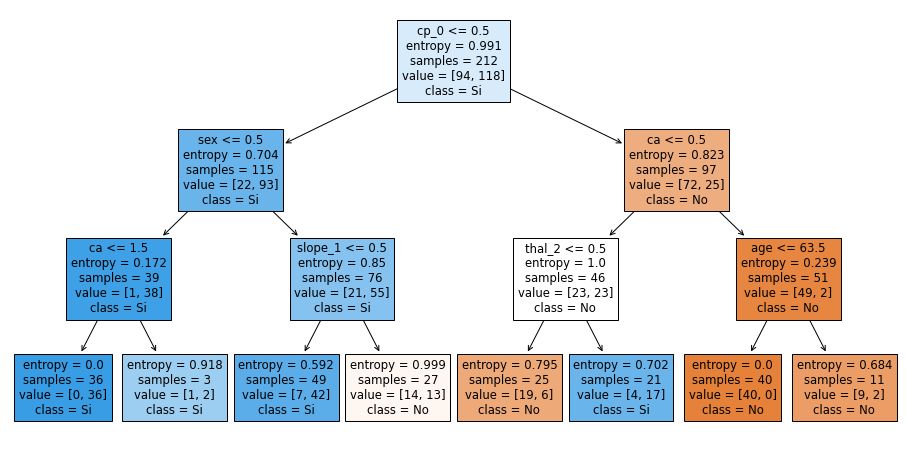

In [ ]:
#Árbol de Decisión resultante
fn = x.columns.to_list()
cn = ['No','Si']
fig = plt.figure(figsize = (16,8))
plot_tree(decision_tree, feature_names = fn, class_names = cn, filled = True);

La representación gráfica del árbol de clasificación obtenido permite, entre otras cosas, hallar aquellas variables más importantes para el modelo y por tanto aquellas que aportaron a la reducción de la entropía.



*   Se observa como la ocurrencia o no de dolor en el pecho (cp_0) fue la primera variable utilizada por el árbol, reflejando así lo importante de este signo y haciendolo importante a la hora de ser considerado como factor de riesgo.

*   En el siguiente nivel de profundidad del árbol se observa la utilización de la variable ca_0 con un threshold de 0.5 lo cual establece que la existencia de la floración de al menos uno de los vasos importantes. Claramente, este indicador también tiene gran importancia a la hora de la evaluación de pacientes cardíacos.



In [ ]:
# Finalmente se predicen los datos de test
# Además, se calcula el accuracy obtenido para este conjunto
y_test_tree = decision_tree.predict(x_test)
decision_tree.score(x_test,y_test)

0.8351648351648352

En primer lugar, se observa una exactitud satisfactoria que alcanza el **83.5%** al ser aplicado al conjunto test. 

*   Esta cifra es en un 3.5% mayor a la obtenida con el GridSearchCV con los datos de entrenamiento. Esta pequeña diferencia no es de ninguna manera alarmante ya que es esperable que el modelo se adapte de mayor o menor según el conjunto de datos. Incluso en este caso sucede al contrario de lo esperado en un sobreajuste.
*   En comparación con las métricas obtenidas en el modelo de *Regresión Logística* se observa una mejoría muy pequeña de de **1%** de exactitud con el conjunto de datos test. Se evaluarán más adelante otros indicadores como la curva ROC para poder tener un panorama más claro a la hora de decidir entre estos dos modelos.



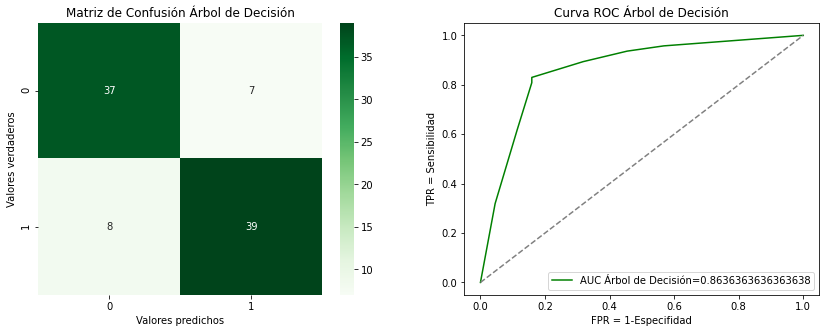

Sensibilidad = 0.8297872340425532
Especifidad = 0.8409090909090909
Precisión = 0.8478260869565217
Exactitud = 0.8351648351648352


In [ ]:
#Matriz de confusión y Curva ROC Árboles de Decisión
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
axes = axes.flatten()

#Matriz de confusión
ax = axes[0]
TN_dt, FP_dt, FN_dt, TP_dt = confusion_matrix(y_test,y_test_tree, labels=[0,1]).ravel()
sns.heatmap([[TN_dt, FP_dt],[FN_dt, TP_dt]], annot=True,cmap=plt.cm.Greens,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Árbol de Decisión')

#Curva ROC
ax = axes[1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree.predict_proba(x_test)[:,1])
auc_dt = roc_auc_score(y_test, decision_tree.predict_proba(x_test)[:,1])
ax.set_xlabel('FPR = 1-Especifidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_dt, tpr_dt, label="AUC Árbol de Decisión="+str(auc_dt), color='green')
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Árbol de Decisión')
ax.legend(loc='lower right')
plt.show()


Sensibilidad_dt,Especifidad_dt,Precision_dt,Exactitud_dt = metricas (TN_dt, FP_dt, FN_dt, TP_dt)

print(f'Sensibilidad = {Sensibilidad_dt}\nEspecifidad = {Especifidad_dt}\nPrecisión = {Precision_dt}\nExactitud = {Exactitud_dt}')

Los resultados de la matriz de confusión dan cuenta de un resultado bastante balanceado entre los Falsos Positivos y Falsos Negativos. Lo cual resulta bastante útil en el caso de que el problema determine un peso equitativo en la consecuencia de los errores. Aunque probablemente en esta aplicación se evite al máximo los falsos negativos por representar la no acción de medidas preventivas y de tratamiento a pacientes que sí lo requerían.

En cuanto a las curva ROC, se obtuvo un valor de AUC de 0.86. Un valor y una forma dentro de los valores esperados, aunque deberán ser comparados con el resto de métodos utilizados para contextualizarlo de mejor manera.

###### **Cross validation** (Decision Tree Classifier)



In [ ]:
# Se ejecuta Cross Validation al set completo para comprobar que el primer train/test split no está sesgado
cv = KFold(n_splits=4, shuffle=True, random_state=23)
i=1
scores_dt = []
for i, score in enumerate(cross_validate(decision_tree, x,y, cv=cv)["test_score"]):
    print(f"Exactitud para la CV #{i}: {score}")
    scores_dt.append(score)
    
cross_validation_score_dt = np.mean(scores_dt)
print('\nExactitud promedio en Cross Validation =',cross_validation_score_dt)

Exactitud para la CV #0: 0.8026315789473685
Exactitud para la CV #1: 0.8289473684210527
Exactitud para la CV #2: 0.7631578947368421
Exactitud para la CV #3: 0.7866666666666666

Exactitud promedio en Cross Validation = 0.7953508771929825


En este caso, considerando todas las filas, resulta una exactitud un poco por debajo de lo obtenido con el conjunto test. Sin embargo, lo que se quería comprobar acá era la establidad en cada una de las hojas. Se alcanzaron valores límites con una distancia máxima por debajo del 6%, lo cual comprueba la estabilidad del modelo obtenido. 

#### **Bosques aleatorios**

Una vez obtenidos los resultados en el modelo de decisión tree se decidió modelar uno de bosques aleatorios debido a que consideran más de un árbol y suelen mejorar los resultados en términos de métricas y estabilidad.

In [ ]:
# Se declaran los parámetros a utilizar en el GridSearchCV el cual considerará hasta 1000 árboles.
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_depth': range(2,10),
               'min_samples_split': range(1,10),
               'min_samples_leaf': range(1,5),
               'bootstrap': [True, False]}

In [ ]:
# Se declara el modelo a utilizar y la grilla completa de parámetros del GridSearch
rf = RandomForestClassifier(random_state=23)
rf_random = GridSearchCV(estimator = rf, cv = 4, verbose=2,  
                         n_jobs = -1,param_grid = random_grid)

***Disclaimer***: Para obtener los mejores parámetros y estimador se debe ejecutar el fit del modelo, el cual se dejó comentado dado su alto costo computacional (más de una hora de ejecución). Se mostrará sólo el resultado de dicha ejecución. En caso de querer ejecutarlo se deben eliminar los comentarios de las dos celdas siguientes:

In [ ]:
#Fit con el GridSearchCV y hallamos los mejores estimadores
#rf_random.fit(x_train,y_train)
#rf_random.best_estimator_

In [ ]:
#rf_random.best_score_

***Resultado del GridSearchCV***:

***Tiempo de ejecución***:\
*Fitting 4 folds for each of 2880 candidates, totalling 11520 fits\
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.\
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   23.4s\
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:  1.8min\
[Parallel(n_jobs=-1)]: Done 375 tasks      | elapsed:  3.8min\
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:  6.9min\
[Parallel(n_jobs=-1)]: Done 1023 tasks      | elapsed: 10.7min\
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed: 15.4min\
[Parallel(n_jobs=-1)]: Done 1995 tasks      | elapsed: 21.1min\
[Parallel(n_jobs=-1)]: Done 2602 tasks      | elapsed: 27.7min\
[Parallel(n_jobs=-1)]: Done 3291 tasks      | elapsed: 35.1min\
[Parallel(n_jobs=-1)]: Done 4060 tasks      | elapsed: 43.5min\
[Parallel(n_jobs=-1)]: Done 4911 tasks      | elapsed: 52.7min\
[Parallel(n_jobs=-1)]: Done 5842 tasks      | elapsed: 62.6min\
[Parallel(n_jobs=-1)]: Done 6855 tasks      | elapsed: 70.8min\
[Parallel(n_jobs=-1)]: Done 7948 tasks      | elapsed: 79.8min\
[Parallel(n_jobs=-1)]: Done 9123 tasks      | elapsed: 89.8min\
[Parallel(n_jobs=-1)]: Done 10378 tasks      | elapsed: 100.5min\
[Parallel(n_jobs=-1)]: Done 11520 out of 11520 | elapsed: 110.3min finished\*

***Mejor estimador***:\
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\
                       criterion='gini', max_depth=4, max_features='auto',\
                       max_leaf_nodes=None, max_samples=None,\
                       min_impurity_decrease=0.0, min_impurity_split=None,\
                       min_samples_leaf=4, min_samples_split=9,\
                       min_weight_fraction_leaf=0.0, n_estimators=1000,\
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,\
                       warm_start=False)


Con los mejores parámetros se hace el fit del modelo con los datos de entrenamiento y las predicciones del mismo con los datos del conjunto de test.

In [ ]:
forest=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

# Entrenamiento del modelo
forest.fit(x_train,y_train)

# Predicción con los datos test
forest_y_pred=forest.predict(x_test)

Finalmente se calculan las métricas del modelo y se grafica la curva ROC correspondiente

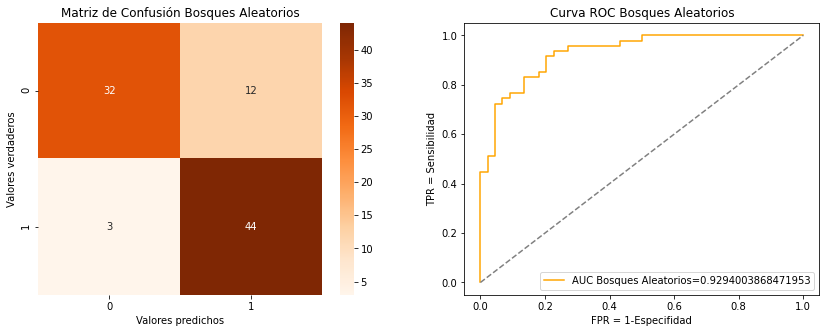

Sensibilidad = 0.9361702127659575
Especifidad = 0.7272727272727273
Precisión = 0.7857142857142857
Exactitud = 0.8351648351648352


In [ ]:
#Matriz de confusión y Curva ROC Bosques Aleatorios
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
axes = axes.flatten()
#Matriz de confusión
ax = axes[0]
TN_rf, FP_rf, FN_rf, TP_rf = confusion_matrix(y_test,forest_y_pred, labels=[0,1]).ravel()
sns.heatmap([[TN_rf, FP_rf],[FN_rf, TP_rf]], annot=True,cmap=plt.cm.Oranges,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Bosques Aleatorios')
#Curva ROC
ax = axes[1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, forest.predict_proba(x_test)[:,1])
auc_rf = roc_auc_score(y_test, forest.predict_proba(x_test)[:,1])
ax.set_xlabel('FPR = 1-Especifidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_rf, tpr_rf, label="AUC Bosques Aleatorios="+str(auc_rf), color='orange')
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Bosques Aleatorios')
ax.legend(loc='lower right')
plt.show()


Sensibilidad_rf,Especifidad_rf,Precision_rf,Exactitud_rf = metricas (TN_rf, FP_rf, FN_rf, TP_rf)

print(f'Sensibilidad = {Sensibilidad_rf}\nEspecifidad = {Especifidad_rf}\nPrecisión = {Precision_rf}\nExactitud = {Exactitud_rf}')



*   Se puede observar en la matriz de confusión como existe un desequilibrio evidente entre los **falsos** positivos y negativos del modelo y por ende un alto valor de la Sensibilidad aunque un poco bajo para la especificidad. Esto puede ser beneficioso al ser un caso de clasificación para la posible presencia de un infarto, en donde los falsos negativos son mortales.
*   El valor de Exactitud se ubica en 0.83. Un valor aceptable y que luego compararemos con el resto de los métodos.
*   Se obtuvo un valor AUC de la curva ROC de caso 0.93 lo cual indica un muy bien compartamiento del modelo para los datos test y una mejora respecto a los dos métodos anteriores.



In [ ]:
# Se ejecuta Cross Validation al set completo para comprobar que el primer train/test split no está sesgado
cv = KFold(n_splits=4, shuffle=True, random_state=23)
i=1
scores_rf = []
for i, score in enumerate(cross_validate(forest, x,y, cv=cv)["test_score"]):
    print(f"Exactitud para la CV #{i}: {score}")
    scores_rf.append(score)
    
cross_validation_score_rf = np.mean(scores_rf)
print('\nExactitud promedio en Cross Validation =',cross_validation_score_rf)

Exactitud para la CV #0: 0.8552631578947368
Exactitud para la CV #1: 0.8289473684210527
Exactitud para la CV #2: 0.7894736842105263
Exactitud para la CV #3: 0.88

Exactitud promedio en Cross Validation = 0.838421052631579


En este caso se observa como la exactitud promedio para el CV aplicado a **todo** el dataset es casi idéntico al obtenido con los datos de test. Por otro lado, no se tienen valores muy dispares en cada hoja

**Representación gráfica de uno de los árboles del bosque utilizado**

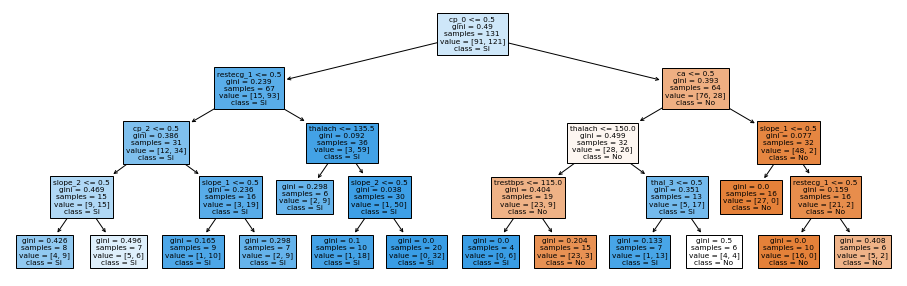

In [ ]:
fn = x.columns.to_list()
cn = ['No','Si']
fig = plt.figure(figsize = (16,5))
plot_tree(forest.estimators_[1], feature_names = fn, class_names = cn, filled = True);

Se puede dilucidar en uno de los árboles utilizados para llevar a cabo el output del modelo, cómo se repite la importancia de la variable cp_0 que se refiere dolor de pecho. Además, agrega como variable de relevancia a los resultados obtenidos en el electrocardiograma en reposo, en especial aquellas anomalías ST-T.

#### **Support Vector Machine**


Como último modelo de clasificación se aplicará el método de Máquinas de Soporte Vectorial. Se utilizará un GridSearch para iterar sobre los hiperparámetros del modelo para los cuales se definen distintos valores de *C* que es el parámetro de regularización y distintos *Kernel* entre los que se encuentran el lineal, gaussiano y polinomial con distintos grados. 

In [ ]:
#Parámetros a iterar en el GriidSearch
svc_grid = {'C' : [0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1,10],
         'kernel': ['rbf','poly','linear'],
         #'probability' : [True],
         'degree' : [3,4,5,6,7,8,9,10,20,30]}

# Definición del modelo, ajustando random_state para obtener mismos resultados cada vez que se ejecute el notebook
svc = SVC(random_state=23)

#Definición de GriSearch con parámetros asignados y CrossValidation Folds = 4
grid_SVC = GridSearchCV(svc, svc_grid, cv = 4)

#Se ejecuta el fit del modelo
grid_SVC.fit(x_train,y_train)

#Se imprime el mejor estimador, para usar los hiperparámetros en el modelo
print("Mejor estimador SVM = ",grid_SVC.best_estimator_)
print("\nHiperparámetros =",grid_SVC.best_params_)
print("\nMejor exactitud =",grid_SVC.best_score_)

Mejor estimador SVM =  SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=23, shrinking=True, tol=0.001,
    verbose=False)

Hiperparámetros = {'C': 0.2, 'degree': 3, 'kernel': 'linear'}

Mejor exactitud = 0.8490566037735849


Los mejores hiperparámetros para este modelo son: valor de parámetro de regularización **C=0.2** con un **Kernel lineal**, por lo que la superficie que separará las categorías será un hiperplano (el valor degree no se toma en cuenta ya que sólo aplica si el Kernel es polinomial). La exactitud obtenida fue de un **0.85** ejecutándose la evaluación y Cross-Validation sobre los datos de train, por lo que posteriormente se medirá la exatitud sobre los datos de test y de esta forma se prevendrá el sobreajuste.

Adicionalmente, se fija el parámetro *probability* en *True* para poder obtener las probabilidades de distribución entre las clases de salida. Dado que los modelos de clasificación no tienen métodos probabilísticos por defecto, en SVM se utiliza la técnica de **Calibración de Platt** para poder transformar las salidas del modelo de clasificación en distribución de probabilidad entre las clases.

Se procede a aplicar los hiperparámetros obtenidos y ejecutar el fit del modelo:

In [ ]:
#Aplicación de hiperparámetros
svc_model = SVC(kernel='linear', C=0.2, probability=True, random_state=23)

#Fit del modelo
svc_model.fit(x_train,y_train)

#Predicciones en el set de test
svm_y_pred=svc_model.predict(x_test)

Para ejecutar las predicciones en el set de test se procederá a evaluar dos métodos:

**1) Predicción por defecto del modelo de clasificación**, la cual es ejecutada por la función de decisión del modelo SVM que toma la distancia del punto al plano de las variables de test y el signo y provee el output de la clasificación binaria:

In [ ]:
#Predicciones en el set de test
svm_y_pred=svc_model.predict(x_test)

#Se procede a imprimir métricas
TN_sv, FP_sv, FN_sv, TP_sv = confusion_matrix(y_test,svm_y_pred, labels=[0,1]).ravel()
Sensibilidad_sv,Especifidad_sv,Precision_sv,Exactitud_sv = metricas (TN_sv, FP_sv, FN_sv, TP_sv)

print(f'Sensibilidad = {Sensibilidad_sv}\nEspecifidad = {Especifidad_sv}\nPrecisión = {Precision_sv}\nExactitud = {Exactitud_sv}')

Sensibilidad = 0.8297872340425532
Especifidad = 0.7727272727272727
Precisión = 0.7959183673469388
Exactitud = 0.8021978021978022


**2) Predicción por umbral de probabilidad entre las clases (Calibración de Platt):** Se exploran las métricas resultante de acuerdo a los distintos umbrales de probabilidad

In [ ]:
#Se imprimen las métricas de acuerdo a distintos umbrales para escoger el mejor umbral de comparación de probabilidades
df_metricas_svm = print_metrics(svc_model.predict_proba(x_test),y_test,20)
df_metricas_svm

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
TP,47.00,47.00,47.00,46.00,45.00,45.00,45.00,43.00,39.00,39.00,38.00,36.00,36.00,33.00,31.00,28.00,25.00,21.00,7.00
FN,0.00,0.00,0.00,1.00,2.00,2.00,2.00,4.00,8.00,8.00,9.00,11.00,11.00,14.00,16.00,19.00,22.00,26.00,40.00
FP,32.00,22.00,19.00,16.00,16.00,15.00,14.00,13.00,12.00,10.00,8.00,7.00,6.00,5.00,4.00,2.00,1.00,1.00,0.00
TN,12.00,22.00,25.00,28.00,28.00,29.00,30.00,31.00,32.00,34.00,36.00,37.00,38.00,39.00,40.00,42.00,43.00,43.00,44.00
Sensibilidad,1.00,1.00,1.00,0.98,0.96,0.96,0.96,0.91,0.83,0.83,0.81,0.77,0.77,0.70,0.66,0.60,0.53,0.45,0.15
Especifidad,0.27,0.50,0.57,0.64,0.64,0.66,0.68,0.70,0.73,0.77,0.82,0.84,0.86,0.89,0.91,0.95,0.98,0.98,1.00
Precision,0.59,0.68,0.71,0.74,0.74,0.75,0.76,0.77,0.76,0.80,0.83,0.84,0.86,0.87,0.89,0.93,0.96,0.95,1.00
Exactitud,0.65,0.76,0.79,0.81,0.80,0.81,0.82,0.81,0.78,0.80,0.81,0.80,0.81,0.79,0.78,0.77,0.75,0.70,0.56


Del resultado obtenido se tiene que el mejor umbral es **0.55**, arrojando las métricas más elevadas y balanceadas. Se procede a ejecutar las predicciones con el set de test:

In [ ]:
#Decisión de probabilidades
df_prob_sv = pd.DataFrame(svc_model.predict_proba(x_test)[:,1])
df_prob_sv['prediction']=np.where(df_prob[0]>0.55,1,0)
df_prob_sv['actual'] = y_test

#Se calculan e imprimen métricas
TN_sv_prob, FP_sv_prob, FN_sv_prob, TP_sv_prob = confusion_matrix(df_prob_sv['actual'],df_prob_sv['prediction'], labels=[0,1]).ravel()
Sensibilidad_sv_prob,Especifidad_sv_prob,Precision_sv_prob,Exactitud_sv_prob = metricas (TN_sv_prob, FP_sv_prob, FN_sv_prob, TP_sv_prob)

print(f'Sensibilidad = {Sensibilidad_sv_prob}\nEspecifidad = {Especifidad_sv_prob}\nPrecisión = {Precision_sv_prob}\nExactitud = {Exactitud_sv_prob}')

Sensibilidad = 0.851063829787234
Especifidad = 0.8181818181818182
Precisión = 0.8333333333333334
Exactitud = 0.8351648351648352


De acuerdo a las métricas resultantes en la predicción del set de test para los dos métodos se decide optar por la **predicción por defecto del modelo de clasificación** ya que las mejoras en el uso de predicciones por probabilidades están a nivel de centésimas, teniendo en cuenta que agregaría valor utilizarlas si la diferencia de valores en métricas estuviese a nivel de décimas.

Ya definido el método de predicción, se procede a evaluar el modelo para lo cual se grafica la matriz de confusión y mas métricas Sensibilidad, Especifidad, Precisión y Exactitud. Adicionalmente se grafica la curva ROC la cual estará basada en la aplicación del método de calibración de Platt para  SVM.

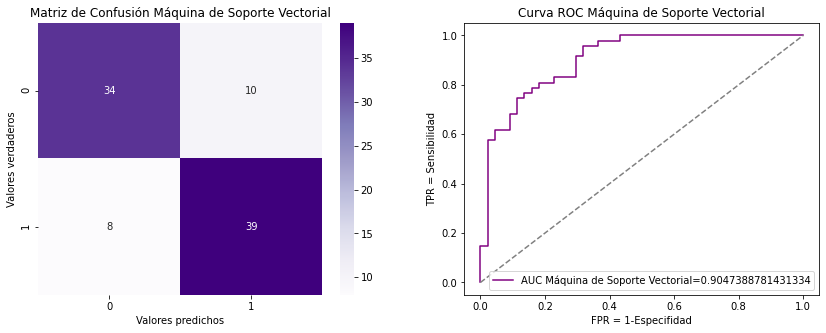

Sensibilidad = 0.8297872340425532
Especifidad = 0.7727272727272727
Precisión = 0.7959183673469388
Exactitud = 0.8021978021978022


In [ ]:
#Matriz de confusión y Curva ROC Support Vector Machines

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
axes = axes.flatten()
#Matriz de confusión
ax = axes[0]
TN_sv, FP_sv, FN_sv, TP_sv = confusion_matrix(y_test,svm_y_pred, labels=[0,1]).ravel()
sns.heatmap([[TN_sv, FP_sv],[FN_sv, TP_sv]], annot=True,cmap=plt.cm.Purples,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Máquina de Soporte Vectorial')
#Curva ROC
ax = axes[1]
fpr_sv, tpr_sv, thresholds_sv = roc_curve(y_test, svc_model.predict_proba(x_test)[:,1])
auc_sv = roc_auc_score(y_test, svc_model.predict_proba(x_test)[:,1])
ax.set_xlabel('FPR = 1-Especifidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_sv, tpr_sv, label="AUC Máquina de Soporte Vectorial="+str(auc_sv), color='purple')
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Máquina de Soporte Vectorial')
ax.legend(loc='lower right')
plt.show()


Sensibilidad_sv,Especifidad_sv,Precision_sv,Exactitud_sv = metricas (TN_sv, FP_sv, FN_sv, TP_sv)

print(f'Sensibilidad = {Sensibilidad_sv}\nEspecifidad = {Especifidad_sv}\nPrecisión = {Precision_sv}\nExactitud = {Exactitud_sv}')

* Los resultados de la matriz de confusión dan un resultado muy similar al obtenido el el modelo DecisionTrees, teniendo resultados bastante balanceados entre los Falsos Positivos y Falsos Negativos. Dado esto, conviene evaluar el modelo de acuerdo a la exactitud de los resultados ya que la posibilidad de detectar falsos negativos o positivos es similar, no pudiéndose evitar los falsos negativos que son las predicciones que se desea evitar de acuerdo al presente caso de estudio. 
* En el caso de querer priorizar los falsos negativos en el modelo se puede ajustar el umbral de decisión y el método de predicción a probabilidades por calibración de Platt, pero para obtener una Sensibilidad = 1 (detección perfecta de Falsos Negativos) se estaría sacrificando en demasía las otras métricas del modelo.
* Con respecto a la curva ROC, se obtuvo un área bajo la curva de 0.90, la cual será posteriormente comparada con los otros modelos.

Finalmente, se ejecuta CrossValidation al set completo de datos de manera de asegurar que el train/test aplicado desde un inicio no esté sesgado y el set de datos completo responda con valores de precisión similares a los evaluados sólo con el set de test.

In [ ]:
# Se ejecuta Cross Validation al set completo para comprobar que el primer train/test split no está sesgado
cv = KFold(n_splits=4, shuffle=True, random_state=23)
i=1
scores_sv = []
for i, score in enumerate(cross_validate(svc_model, x,y, cv=cv)["test_score"]):
    print(f"Exactitud para la CV #{i}: {score}")
    scores_sv.append(score)
    
cross_validation_score_sv = np.mean(scores_sv)
print('\nExactitud promedio en Cross Validation =',cross_validation_score_sv)

Exactitud para la CV #0: 0.8157894736842105
Exactitud para la CV #1: 0.8289473684210527
Exactitud para la CV #2: 0.7763157894736842
Exactitud para la CV #3: 0.8666666666666667

Exactitud promedio en Cross Validation = 0.8219298245614035


Se obtiene como resultado una exactitud promedio en Cross Validation de **0.82**, valor muy cercano (diferencia en centésimas) a la exactitud en la evaluación del set de test que es **0.80** por lo que podemos afirmar que el modelo responde efctivamente a distintas separaciones del set de datos arrojando los valores de exactitud esperados.

#### **Comparación de métricas de modelos**

Finalmente se comparan los modelos en términos de métricas, matriz de confusión y Curva ROC para así concluir con un análisis completo y detallado de las soluciones propuestas a este problema de clasificación.

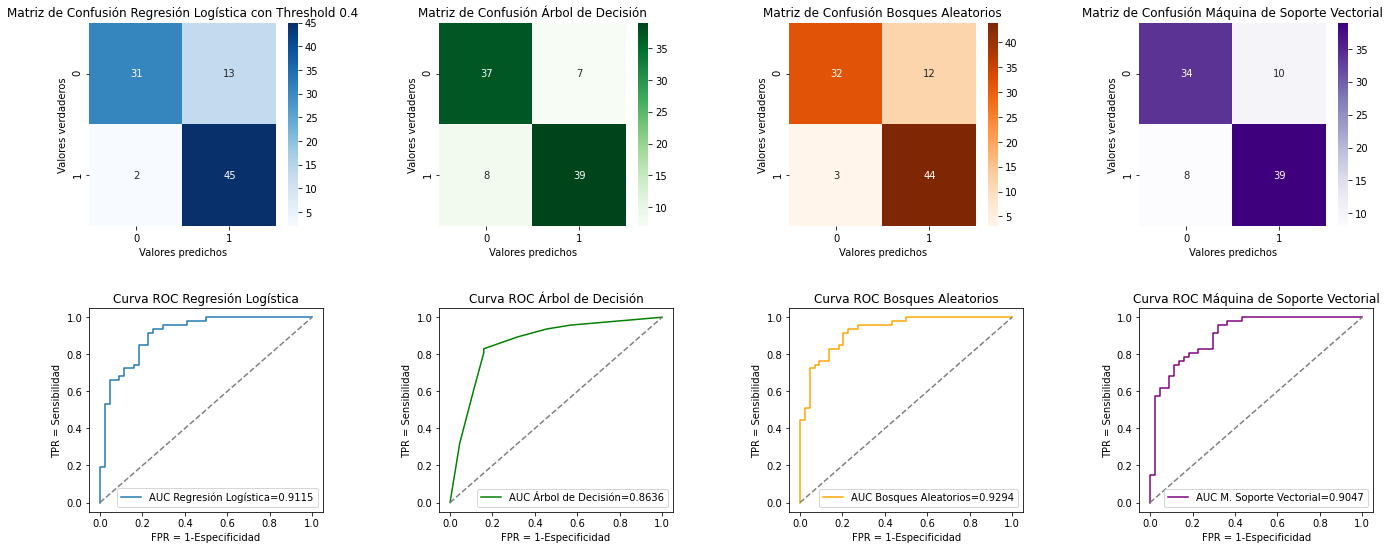

In [ ]:
#Gráfico de todas las curvas ROC y matrices de confusión
fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (23,9))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
axes = axes.flatten()
#Matriz de confusión LR
ax = axes[0]
sns.heatmap([[TN_lr, FP_lr],[FN_lr, TP_lr]], annot=True,cmap=plt.cm.Blues,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Regresión Logística con Threshold 0.4')
#Curva ROCLR
ax = axes[4]
ax.set_xlabel('FPR = 1-Especificidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_lr, tpr_lr, label="AUC Regresión Logística="+str(auc_lr)[:6])
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Regresión Logística')
ax.legend(loc='lower right')
#Matriz de confusión DT
ax = axes[1]
sns.heatmap([[TN_dt, FP_dt],[FN_dt, TP_dt]], annot=True,cmap=plt.cm.Greens,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Árbol de Decisión')
#Curva ROC DT
ax = axes[5]
ax.set_xlabel('FPR = 1-Especificidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_dt, tpr_dt, label="AUC Árbol de Decisión="+str(auc_dt)[:6], color='green')
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Árbol de Decisión')
ax.legend(loc='lower right')
#Matriz de confusión RF
ax = axes[2]
sns.heatmap([[TN_rf, FP_rf],[FN_rf, TP_rf]], annot=True,cmap=plt.cm.Oranges,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Bosques Aleatorios')
#Curva ROC RF
ax = axes[6]
ax.set_xlabel('FPR = 1-Especificidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_rf, tpr_rf, label="AUC Bosques Aleatorios="+str(auc_rf)[:6], color='orange')
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Bosques Aleatorios')
ax.legend(loc='lower right')
#Matriz de confusión SVM
ax = axes[3]
sns.heatmap([[TN_sv, FP_sv],[FN_sv, TP_sv]], annot=True,cmap=plt.cm.Purples,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Máquina de Soporte Vectorial')
#Curva ROC SVM
ax = axes[7]
ax.set_xlabel('FPR = 1-Especificidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_sv, tpr_sv, label="AUC M. Soporte Vectorial="+str(auc_sv)[:6], color='purple')
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Máquina de Soporte Vectorial')
ax.legend(loc='lower right')
plt.show()

Gráfica de las **Curvas ROC superpuestas**:

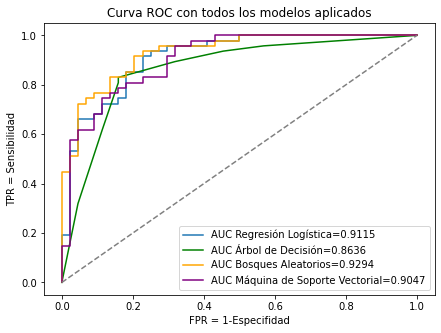

In [ ]:
#Curva ROC unificada
fig = plt.figure(figsize = (7,5))
plt.xlabel('FPR = 1-Especifidad')
plt.ylabel('TPR = Sensibilidad')
plt.plot(fpr_lr, tpr_lr, label="AUC Regresión Logística="+str(auc_lr)[:6])
plt.plot(fpr_dt, tpr_dt, label="AUC Árbol de Decisión="+str(auc_dt)[:6], color ='green')
plt.plot(fpr_rf, tpr_rf, label="AUC Bosques Aleatorios="+str(auc_rf)[:6], color = 'orange')
plt.plot(fpr_sv, tpr_sv, label="AUC Máquina de Soporte Vectorial="+str(auc_sv)[:6], color = 'purple')
plt.plot([0,1], [0,1], 'k--', color='grey')
plt.title('Curva ROC con todos los modelos aplicados')
plt.legend(loc='lower right')
plt.show()

**Métricas y comparaciones de las clasificaciones**

In [ ]:
#Métricas resultantes de todos los modelos
#Se ordenan los datos
data = [[Sensibilidad_lr,Sensibilidad_dt,Sensibilidad_rf,Sensibilidad_sv],
        [Especifidad_lr,Especifidad_dt,Especifidad_rf,Especifidad_sv],
        [Precision_lr,Precision_dt,Precision_rf,Precision_sv],
        [Exactitud_lr,Exactitud_dt,Exactitud_rf,Exactitud_sv]]

#Se agregan en dataframe
result_metrics = pd.DataFrame(data,columns=['LogisticRegression','DecisionTrees','RandomForest','SVM'], index=['Sensibilidad','Especifidad','Precision','Exactitud'])
result_metrics

,LogisticRegression,DecisionTrees,RandomForest,SVM
Sensibilidad,0.957447,0.829787,0.936170,0.829787
Especifidad,0.704545,0.840909,0.727273,0.772727
Precision,0.775862,0.847826,0.785714,0.795918
Exactitud,0.835165,0.835165,0.835165,0.802198


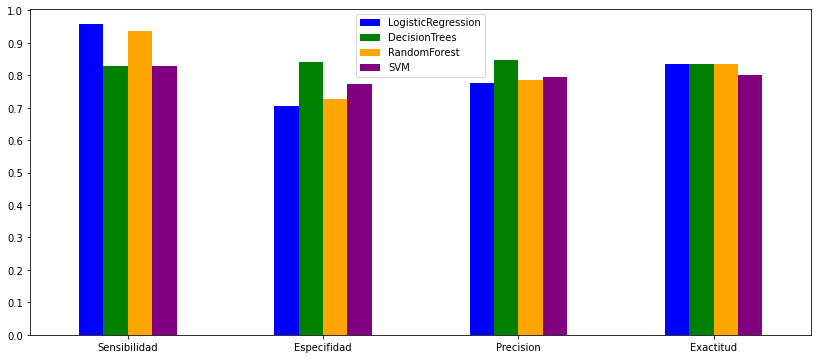

In [ ]:
#Gráfico de barras de métricas de todos los modelos
result_metrics.plot.bar(rot=0,figsize = (14,6),color=['blue','green','orange','purple'])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

### **Análisis y conclusiones finales**

La resolución de este caso de clasificación mediante diferentes métodos de *Machine Learning* permitió no sólo afianzar conocimientos adquiridos en 4 diferentes algrotimos (**Regresión Logística, Árboles de Decisión, Bosques Aleatorios y SVM**) sino también implementar diferentes técnicas y métricas que se deben tener en cuenta a lam hora de elegir la solución más adecuada según el caso de estudio. A continuación, se presentan algunos de los insights más importantes obtenidos durante esta investigación:


*   En cada uno de los algoritmos se obtuvo un valor de AUC para la curva ROC satisfactorio. Sin embargo, destaca claramente el desempeño del Random Forest con un valor de 0.929, por encima del resto de los casos. 
*   La curva ROC de árbol decisión es la que posee el desempeño más bajo con un valor de 0.8639.
*   Al comparar y superponer estas curvas se observa como la correspondiente al Random Forest (amarillo) se encuentra por encima en prácticamente todos los posibles thresholds por encima del resto. Además, es importante resaltar la deficiente curva del Árbol de Decisión, en donde se tienen valores satisfactorios de sensibilidad y especificidad en muy pocos puntos.
*   Respecto a las matrices de confusión obtenidas se observa como en tres de los cuatro métodos se obtuvo 15 clasificaciones falsas mientras para el SVC se obtuvo un total de 18. En cuanto a la distribución de estos fallos resulta interesante la baja cantidad de *Falsos Negativos* en la **RL** y **RF**. Esto claramente podría ser un problema en caso de que el objetivo sea tener un resultado balanceado de los errores, sin embargo, sabiendo la importancia y el peso de evitar diagnósticos negativos en el área médica, estos resultados posiblemente sean precisamente los buscados por los expertos.
*   Si bien resulta complejo escoger un sólo método de solución, desde el análisis de las métricas y curvas ya discutidas, **se recomienda la elección del Random Forest por su desempeño**. Aunque, si se quisiera **ahorrar en términos computacionales** (RF tiene su mayor desventaja en este apartado) se recomienda la **Regresión Logística** por ser un método más sencillo y aún así efectivo.
*   Por último, cabe destacar las variables que fueron de mayor importancia a la hora de aplicar la clasificación con los diferentes métodos. Estas variables que en este contexto corresponden a síntomas y/o signos que representan un factor de riesgo para la ocurrencia de infartos fueron las referidas a dolor de pecho de tipo angina (**cp_0**), resultados de la coronariografía (**ca**), sexo del paciente (**sex**) y la alteración del segmento ST en reposo (**restecg_1**).

